## TFM: Optmimización de la toma de decisiones empresariales mediante el análisis de datos
### Notebook para la exploración y preparación de los datos.
### Objetivo: Preparar los datos para implementar distintos modelos de predicción para estimar el volumen de trabajo que habría en las últimas semanas del año para la organización de los recursos y análisis de los costes para el cumplimiento de los objetivos de margen del proyecto.

## 1. Exploración y procesamiento de los datos
### Vamos a cargar el fichero base para contruir nuestro dataframe y analizar las variables de las que disponemos. Analizamos los tipos de variables con las que contamos, tratamiento de nulos y análisis de los posibles outliers.

In [1]:
# Librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Lectura de datos
df = pd.read_csv('C:/Users/UX530/Desktop/TFM-GIT/Origin_Files/extended_cto_2025-09-30_09_35.csv', delimiter = ';' , encoding = 'UTF-8')

In [3]:
# Información básica del DataFrame
print(f"El número de filas y columnas es: {df.shape}")
print(f"El tipo de datos de cada columna es:\n{df.dtypes}")

El número de filas y columnas es: (11505, 28)
El tipo de datos de cada columna es:
ID                                 int64
CTO                               object
Código CTO                        object
Estado                            object
Tipo de ampliación                object
Ticket Jira                       object
EC                                object
Fecha de solicitud                object
Fecha de ejecución                object
Fecha de documentación            object
Fecha de parada                   object
Fecha de reanudación              object
Fecha Documentación Rechazada     object
Fecha  Documentación Reparada     object
Fecha de finalización             object
Fecha Cancelación                 object
SLA                               object
Geotipo                           object
Nueva CTO                         object
Rechazos (iteraciones)           float64
Provincia                         object
Población                         object
Zona           

### Observamos que el 89% de las variables se han cargado con el tipo Object, será necesario realizar una transformación de los datos necesarios, para ello haremos una copia del df original para trabajar sobre el y no perder la traza del df original.

In [4]:
# Realizamos la copia del df original y lo nombramos df_CTO ya que tiene muchas variables relacionadas 
# con los CTOs (Cajas terminales ópticas)
df_CTO = df.copy()
print(f"El número de filas y columnas es: {df_CTO.shape}")
print(f"El tipo de datos de cada columna es:\n{df_CTO.dtypes}")

El número de filas y columnas es: (11505, 28)
El tipo de datos de cada columna es:
ID                                 int64
CTO                               object
Código CTO                        object
Estado                            object
Tipo de ampliación                object
Ticket Jira                       object
EC                                object
Fecha de solicitud                object
Fecha de ejecución                object
Fecha de documentación            object
Fecha de parada                   object
Fecha de reanudación              object
Fecha Documentación Rechazada     object
Fecha  Documentación Reparada     object
Fecha de finalización             object
Fecha Cancelación                 object
SLA                               object
Geotipo                           object
Nueva CTO                         object
Rechazos (iteraciones)           float64
Provincia                         object
Población                         object
Zona           

### Como el objetivo que tenemos es la predicción de un volumen de trabajo por semanas, necesitamos transformar todas las variables que tengan información de fechas a un tipo .datatime.

In [5]:
# Variables de tipo fecha: Imprimimos las columnas de nuestro df_CTO que contienen la palabra 'fecha' en su nombre
fecha_columns = [col for col in df_CTO.columns if 'fecha' in col.lower()]
print(f"Columnas que contienen la palabra 'fecha':\n{fecha_columns}")


Columnas que contienen la palabra 'fecha':
['Fecha de solicitud', 'Fecha de ejecución', 'Fecha de documentación', 'Fecha de parada', 'Fecha de reanudación', 'Fecha Documentación Rechazada', 'Fecha  Documentación Reparada', 'Fecha de finalización', 'Fecha Cancelación']


In [6]:
# Transformamos las columnas de tipo fecha a formato datetime
for col in fecha_columns:
    try:
        df_CTO[col] = pd.to_datetime(df_CTO[col], errors='coerce')
    except  (ValueError, TypeError):
        pass

print(f"Tipos de datos después de la conversión:\n{df_CTO.dtypes}\nPor ejemplo la columna:\n{df_CTO['Fecha de ejecución'].head(5)}")

Tipos de datos después de la conversión:
ID                                        int64
CTO                                      object
Código CTO                               object
Estado                                   object
Tipo de ampliación                       object
Ticket Jira                              object
EC                                       object
Fecha de solicitud               datetime64[ns]
Fecha de ejecución               datetime64[ns]
Fecha de documentación           datetime64[ns]
Fecha de parada                  datetime64[ns]
Fecha de reanudación             datetime64[ns]
Fecha Documentación Rechazada    datetime64[ns]
Fecha  Documentación Reparada    datetime64[ns]
Fecha de finalización            datetime64[ns]
Fecha Cancelación                datetime64[ns]
SLA                                      object
Geotipo                                  object
Nueva CTO                                object
Rechazos (iteraciones)                  float64

### Ahora vamos a ver el % de nulos que tienen nuestras variables del df_CTO

In [7]:
# % de Nulos en las variables
df_CTO.isnull().mean().sort_values(ascending=False) * 100

Fecha Cancelación                91.716645
Fecha  Documentación Reparada    88.335506
Fecha Documentación Rechazada    86.736202
Rechazos (iteraciones)           86.544980
Fecha de reanudación             84.102564
Nueva CTO                        83.563668
Fecha de parada                  82.477184
Observaciones                    74.767492
Ticket Jira                      69.934811
Fase                             14.550196
Fecha de ejecución               11.273359
Fecha de finalización             9.813125
Fecha de documentación            8.674489
Geotipo                           8.213820
Cluster                           1.199478
Proveedor OLT                     0.095611
Zona                              0.034767
ID                                0.000000
Código CTO                        0.000000
CTO                               0.000000
EC                                0.000000
Tipo de ampliación                0.000000
Fecha de solicitud                0.000000
Estado     

In [8]:
# Eliminamos las columnas que tienen más del 60% de valores nulos
threshold = 0.6
cols_to_drop = df_CTO.columns[df_CTO.isnull().mean() > threshold]
df_CTO.drop(columns=cols_to_drop, inplace=True)
print(f"Columnas eliminadas por tener más del {threshold*100}% de valores nulos:\n{cols_to_drop.tolist()}")


Columnas eliminadas por tener más del 60.0% de valores nulos:
['Ticket Jira', 'Fecha de parada', 'Fecha de reanudación', 'Fecha Documentación Rechazada', 'Fecha  Documentación Reparada', 'Fecha Cancelación', 'Nueva CTO', 'Rechazos (iteraciones)', 'Observaciones']


### Tratamiento de los nulos para el resto de variables: Para las variables numéricas utilizaremos el método de la interpolación y para las variables categóricas, utilizaremos el método de la moda, el valor más repetido.

### Como nuestro objetivo es predecir el nº de ampliaciones por semana que se solicitarán y queremos predecir el volumen de trabajo por provincia, nos quedaremos solo con tres variables para hacer nuestra serie temporal y a partir de ahí poder predecir el resto de semanas. Las variables son : 'Fecha de solicitud', 'CTO' y 'Provincia'.

In [9]:
# Selección de variables para el modelo
cols_model = ['Fecha de solicitud', 'CTO', 'Provincia']
df_CTO_ST = df_CTO[cols_model].copy()

df_CTO_ST.head()

,Fecha de solicitud,CTO,Provincia
0,2019-01-18,489-46-008078.2,VALENCIA
1,2019-01-18,489-46-011192,CASTELLON
2,2019-02-01,489-46-011225,VALENCIA
3,2019-01-18,489-46-011118,VALENCIA
4,2019-01-18,489-46-011158.1,VALENCIA


In [10]:
# Análisis exploratorio de datos, primero agrupamos las ampliaciones por día para ver la tendencia
df_CTO_ST = (
    df_CTO_ST.groupby([pd.Grouper(key='Fecha de solicitud'),'Provincia'])
    .size()
    .reset_index(name='Número de ampliaciones'))
print(df_CTO_ST.head())
print(f"El número de filas y columnas es: {df_CTO_ST.shape}")

archivo_original_df = 'modeloST_CTO.csv'
df_CTO_ST.to_csv(archivo_original_df, index=False, decimal=',', sep=';')

  Fecha de solicitud    Provincia  Número de ampliaciones
0         2019-01-18     ALBACETE                       1
1         2019-01-18    CASTELLON                      10
2         2019-01-18  CIUDAD REAL                      24
3         2019-01-18       CUENCA                       1
4         2019-01-18  GUADALAJARA                       1
El número de filas y columnas es: (4914, 3)


Rango de fechas: 2019-01-18 a 2025-09-30


C:\Users\UX530\AppData\Local\Temp\ipykernel_11936\1136542032.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=df_CTO_ST.groupby(pd.Grouper(key='Fecha de solicitud', freq='W'))['Número de ampliaciones'].sum().reset_index(),


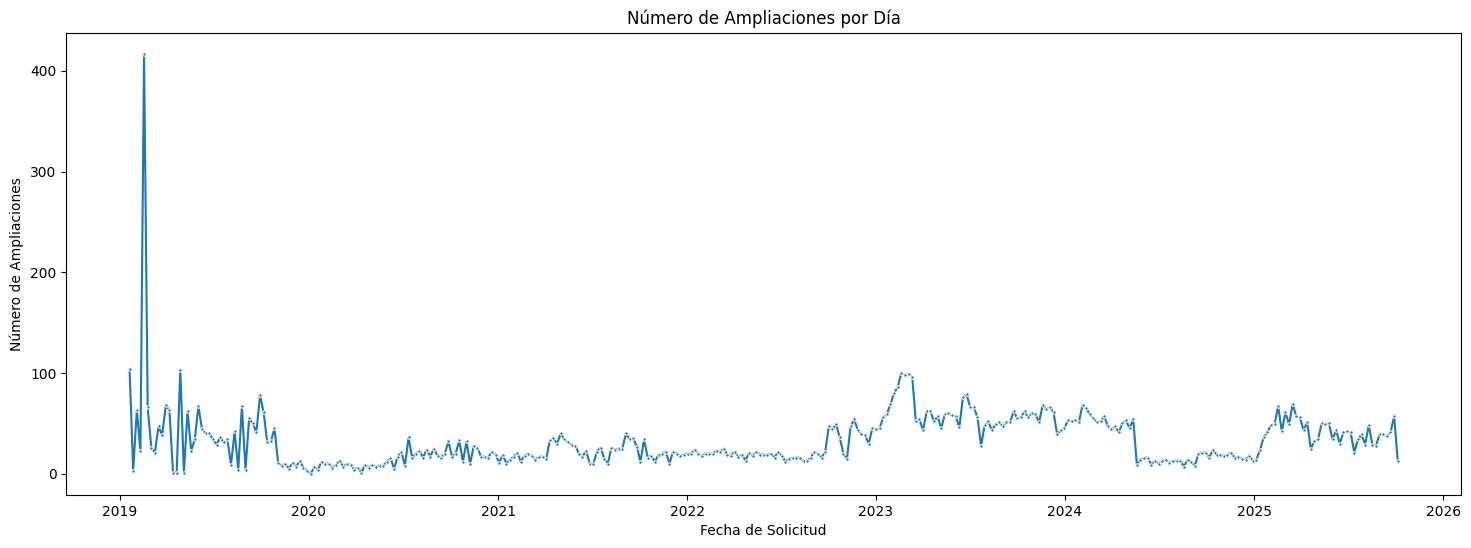

In [11]:
# Visualzación de datos
print("Rango de fechas:", df['Fecha de solicitud'].min(), "a", df['Fecha de solicitud'].max())
plt.figure(figsize=(18, 6))
sns.lineplot(data=df_CTO_ST.groupby(pd.Grouper(key='Fecha de solicitud', freq='W'))['Número de ampliaciones'].sum().reset_index(), 
            x='Fecha de solicitud', 
            y='Número de ampliaciones',
            marker='.',                        
            linestyle='-',                     
            palette='plasma',                
            linewidth=1.5,
            markersize=5)
plt.title('Número de Ampliaciones por Día')
plt.xlabel('Fecha de Solicitud')
plt.ylabel('Número de Ampliaciones')
plt.show()

### Podemos ver una tendencia creciente exponencial tras una caida de las solicitudes en la segunda mitad del año 2.024:
#### Para tener el control de la distintas tencdecias en los años, añadiremos las variables 'Año', 'Semana' y 'Semana-Año'.

In [12]:
# Añadimos variables temporales al dataset para capturar la estacionariedad
df_CTO_ST['Año'] = df_CTO_ST['Fecha de solicitud'].dt.year
df_CTO_ST['Semana'] = df_CTO_ST['Fecha de solicitud'].dt.isocalendar().week
df_CTO_ST['Semana-Año'] = df_CTO_ST['Año'].astype(str) + '-W' + df_CTO_ST['Semana'].astype(str).str.zfill(2) 
df_CTO_ST.head(5)

,Fecha de solicitud,Provincia,Número de ampliaciones,Año,Semana,Semana-Año
0,2019-01-18,ALBACETE,1,2019,3,2019-W03
1,2019-01-18,CASTELLON,10,2019,3,2019-W03
2,2019-01-18,CIUDAD REAL,24,2019,3,2019-W03
3,2019-01-18,CUENCA,1,2019,3,2019-W03
4,2019-01-18,GUADALAJARA,1,2019,3,2019-W03


In [13]:
# Df CTO semanal, para al análisis univariante
df_CTO_weekly=df_CTO_ST.groupby(pd.Grouper(key='Fecha de solicitud', freq='W'))['Número de ampliaciones'].sum().reset_index()
df_CTO_weekly['Año'] = df_CTO_weekly['Fecha de solicitud'].dt.year
df_CTO_weekly['Semana'] = df_CTO_weekly['Fecha de solicitud'].dt.isocalendar().week
df_CTO_weekly['Semana-Año'] = df_CTO_weekly['Año'].astype(str) + '-W' + df_CTO_ST['Semana'].astype(str).str.zfill(2)

df_CTO_weekly = df_CTO_weekly[df_CTO_weekly['Fecha de solicitud'] < pd.to_datetime('2025-06-01')]
print(df_CTO_weekly.head())

  Fecha de solicitud  Número de ampliaciones   Año  Semana Semana-Año
0         2019-01-20                     104  2019       3   2019-W03
1         2019-01-27                       3  2019       4   2019-W03
2         2019-02-03                      63  2019       5   2019-W03
3         2019-02-10                      23  2019       6   2019-W03
4         2019-02-17                     417  2019       7   2019-W03


In [16]:
# Vemos la info de nuestro df semanal
print(f"El número de filas y columnas es: {df_CTO_weekly.shape}")
print(f"El tipo de datos de cada columna es:\n{df_CTO_weekly.dtypes}")
print(f"Descripción estadística de las variables:\n{df_CTO_weekly.describe()}")

El número de filas y columnas es: (332, 5)
El tipo de datos de cada columna es:
Fecha de solicitud        datetime64[ns]
Número de ampliaciones             int64
Año                                int32
Semana                            UInt32
Semana-Año                        object
dtype: object
Descripción estadística de las variables:
        Fecha de solicitud  Número de ampliaciones          Año     Semana
count                  332              332.000000   332.000000      332.0
mean   2022-03-23 12:00:00               32.590361  2021.740964      25.75
min    2019-01-20 00:00:00                0.000000  2019.000000        1.0
25%    2020-08-21 06:00:00               16.000000  2020.000000       13.0
50%    2022-03-23 12:00:00               23.000000  2022.000000       25.0
75%    2023-10-23 18:00:00               48.000000  2023.000000       39.0
max    2025-05-25 00:00:00              417.000000  2025.000000       53.0
std                    NaN               30.032223     1.85

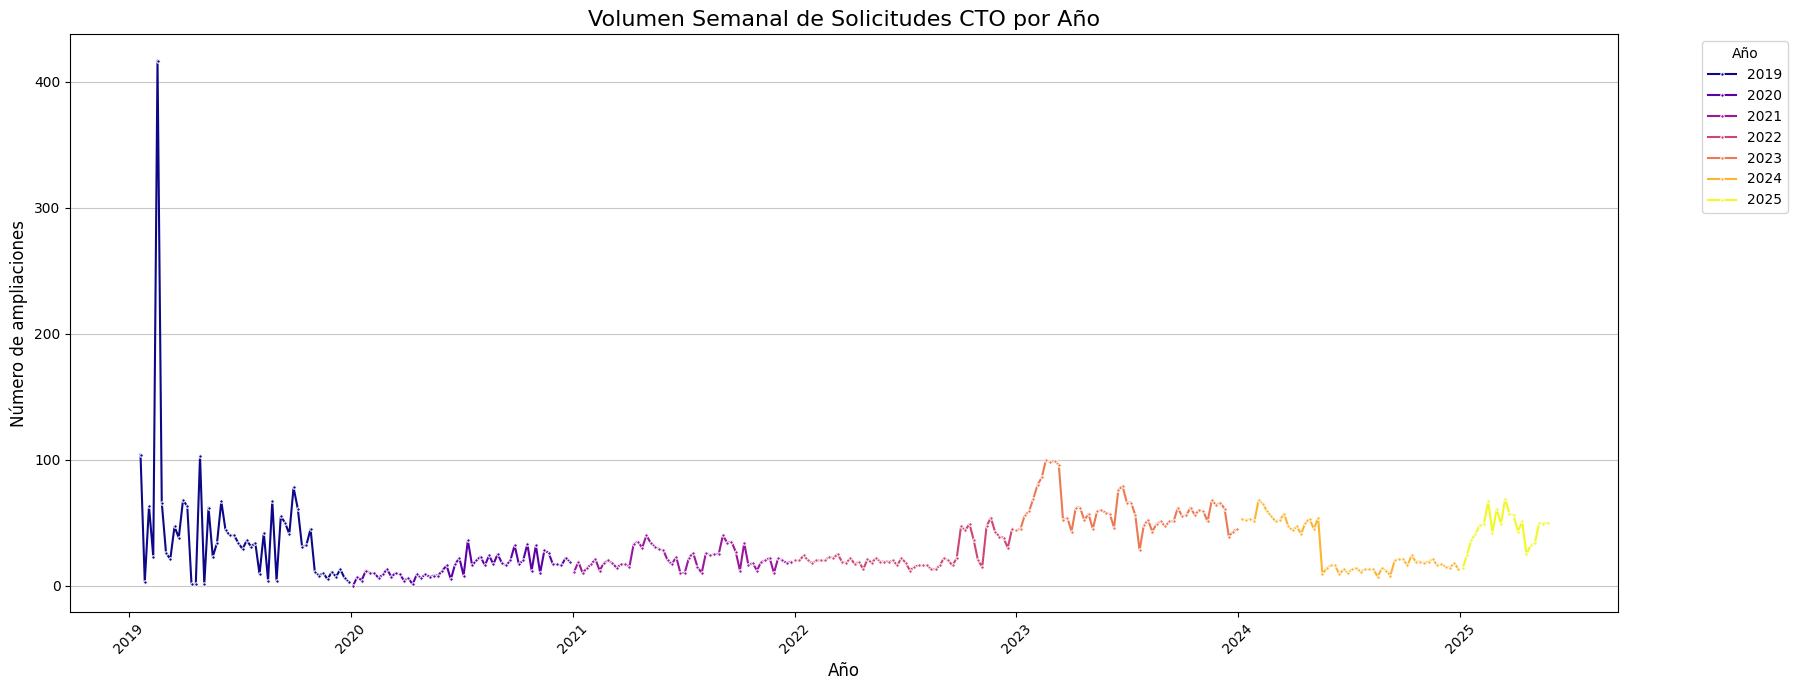

In [14]:
# Visualización de la serie temporal: LINEA DE TIEMPO AGREGADA
plt.figure(figsize=(18, 7))
# La función reset_index() es necesaria para que 'Fecha de solicitud' sea una columna y no el índice
sns.lineplot(
    data=df_CTO_weekly.reset_index(), # Convertimos el índice a columna para seaborn
    x='Fecha de solicitud',
    y='Número de ampliaciones',
    hue='Año',                         
    marker='.',                        
    linestyle='-',                   
    palette='plasma',                
    linewidth=1.5,
    markersize=5
)

plt.title('Volumen Semanal de Solicitudes CTO por Año', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Número de ampliaciones', fontsize=12)
plt.grid(axis='y', alpha=0.7)
plt.xticks(rotation=45)
plt.legend(title='Año', bbox_to_anchor=(1.05, 1), loc='upper left') # Mover la leyenda para no superponer
plt.tight_layout() # Ajustar el diseño para que la leyenda no se corte
plt.show()

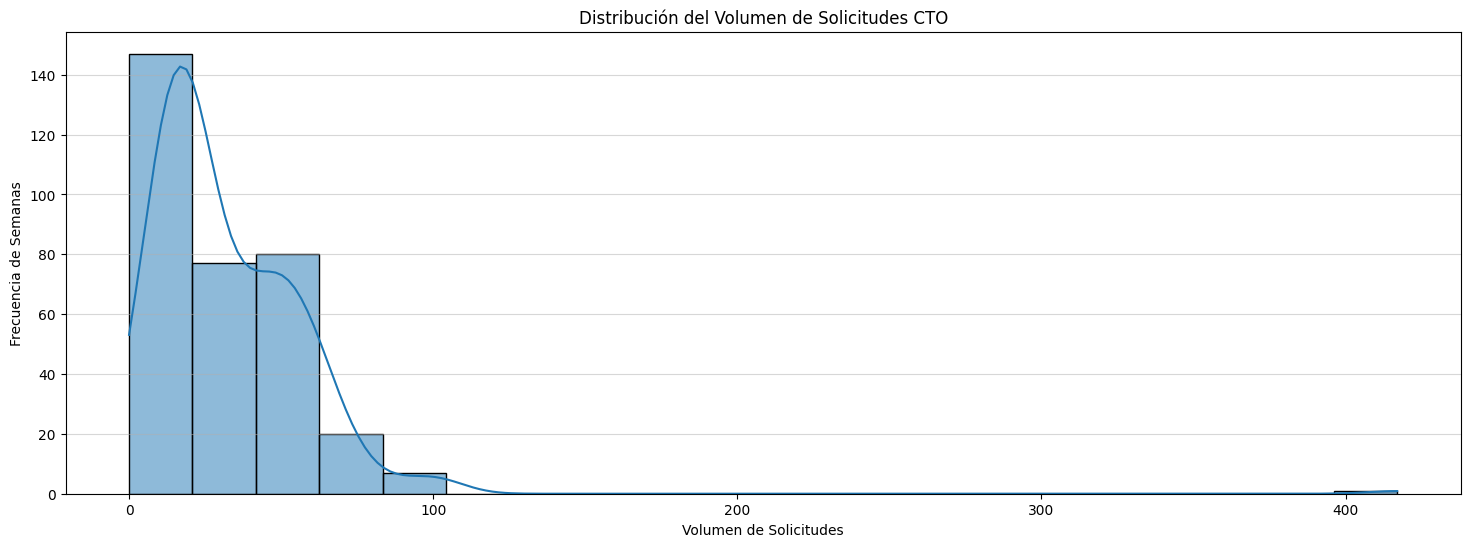

In [15]:
# Visualizamos un histograma
plt.figure(figsize=(18,6))
sns.histplot(df_CTO_weekly['Número de ampliaciones'], bins=20, kde=True)
plt.title('Distribución del Volumen de Solicitudes CTO')
plt.xlabel('Volumen de Solicitudes')
plt.ylabel('Frecuencia de Semanas')
plt.grid(axis='y', alpha=0.5)
plt.show()

C:\Users\UX530\AppData\Local\Temp\ipykernel_11936\1135008563.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Semana', y='Número de ampliaciones', data=df_CTO_weekly, palette='Set3')


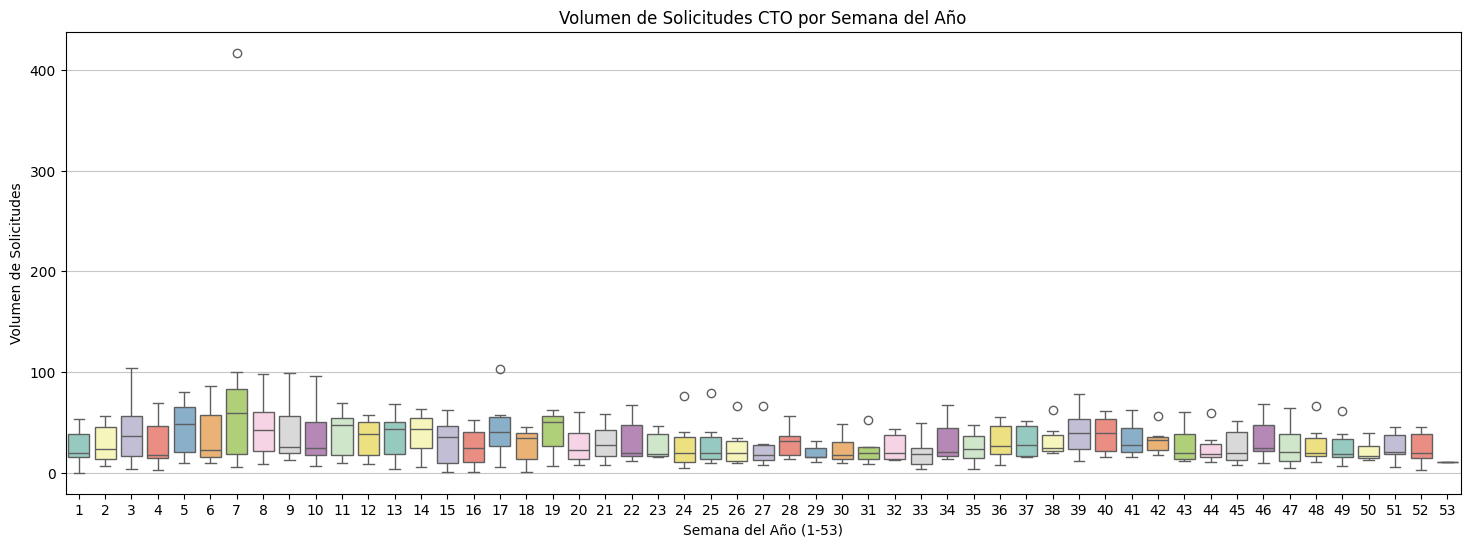

In [19]:
# Visualización boxplot
plt.figure(figsize=(18, 6))
sns.boxplot(x='Semana', y='Número de ampliaciones', data=df_CTO_weekly, palette='Set3')
plt.title('Volumen de Solicitudes CTO por Semana del Año')
plt.xlabel('Semana del Año (1-53)')
plt.ylabel('Volumen de Solicitudes')
plt.grid(axis='y', alpha=0.7)
plt.show()

### Con la visualización de la serie temporal podemos detectar los outliers, el más destacable lo podemos encontrar en w07 del 2019 donde el volumen de ampliaciones que entraron fueron más de 400 solicitudes. Pricedemos al tratemiento de outliers en los dos df, en el univariante y el multivariante.
### Vamos a eliminar el registro del W07 del 2019, el resto lo mantendremos porque consideramos que son registros que marcan cambios de tendencias.

In [24]:
# Eliminamos la semana 7 del año 2019 que es un outlier
df_CTO_weekly_freeoutlier = df_CTO_weekly.drop(df_CTO_weekly[(df_CTO_weekly['Año'] == 2019) & (df_CTO_weekly['Semana'] == 7)].index)
df_CTO_weekly_freeoutlier.head(20) , df_CTO_weekly_freeoutlier.tail(20)

df_CTO_ST_freeoutlier = df_CTO_ST.drop(df_CTO_weekly[(df_CTO_weekly['Año'] == 2019) & (df_CTO_weekly['Semana'] == 7)].index)
df_CTO_ST_freeoutlier.head(20) , df_CTO_ST_freeoutlier.tail(20)

(   Fecha de solicitud    Provincia  Número de ampliaciones   Año  Semana  \
 0          2019-01-18     ALBACETE                       1  2019       3   
 1          2019-01-18    CASTELLON                      10  2019       3   
 2          2019-01-18  CIUDAD REAL                      24  2019       3   
 3          2019-01-18       CUENCA                       1  2019       3   
 5          2019-01-18       LLEIDA                       7  2019       3   
 6          2019-01-18       MADRID                      17  2019       3   
 7          2019-01-18    SALAMANCA                       4  2019       3   
 8          2019-01-18       TOLEDO                      25  2019       3   
 9          2019-01-18     VALENCIA                      14  2019       3   
 10         2019-01-22       TOLEDO                       1  2019       4   
 11         2019-01-25  CIUDAD REAL                       1  2019       4   
 12         2019-01-25     VALENCIA                       1  2019       4   

### Analizamos la serie temporal univariante. Realizamos la descomposición aditiva.

In [25]:
# Importamos la librería para la descomposición de la serie temporal
from statsmodels.tsa.seasonal import seasonal_decompose

ts = df_CTO_weekly_freeoutlier ['Número de ampliaciones']
try:
    decomposition = seasonal_decompose(
        ts, 
        model='additive', 
        period=52 
    )
    print("Descomposición completada exitosamente.")
    
except ValueError as e:
    # Este error ocurre si la serie no tiene suficientes puntos (al menos dos ciclos completos)
    print(f"Error al aplicar period=52: {e}")
    print("Intentando con un período más corto (ej. period=4 para estacionalidad mensual aproximada).")
    decomposition = seasonal_decompose(
        ts, 
        model='additive',
        period=4
    )
    print("Descomposición completada con un período de 4.")

Descomposición completada exitosamente.


In [96]:
df_CTO_weekly_freeoutlier.to_csv('modeloST_CTO_sin_outlier.csv', index=False, decimal=',', sep=';')

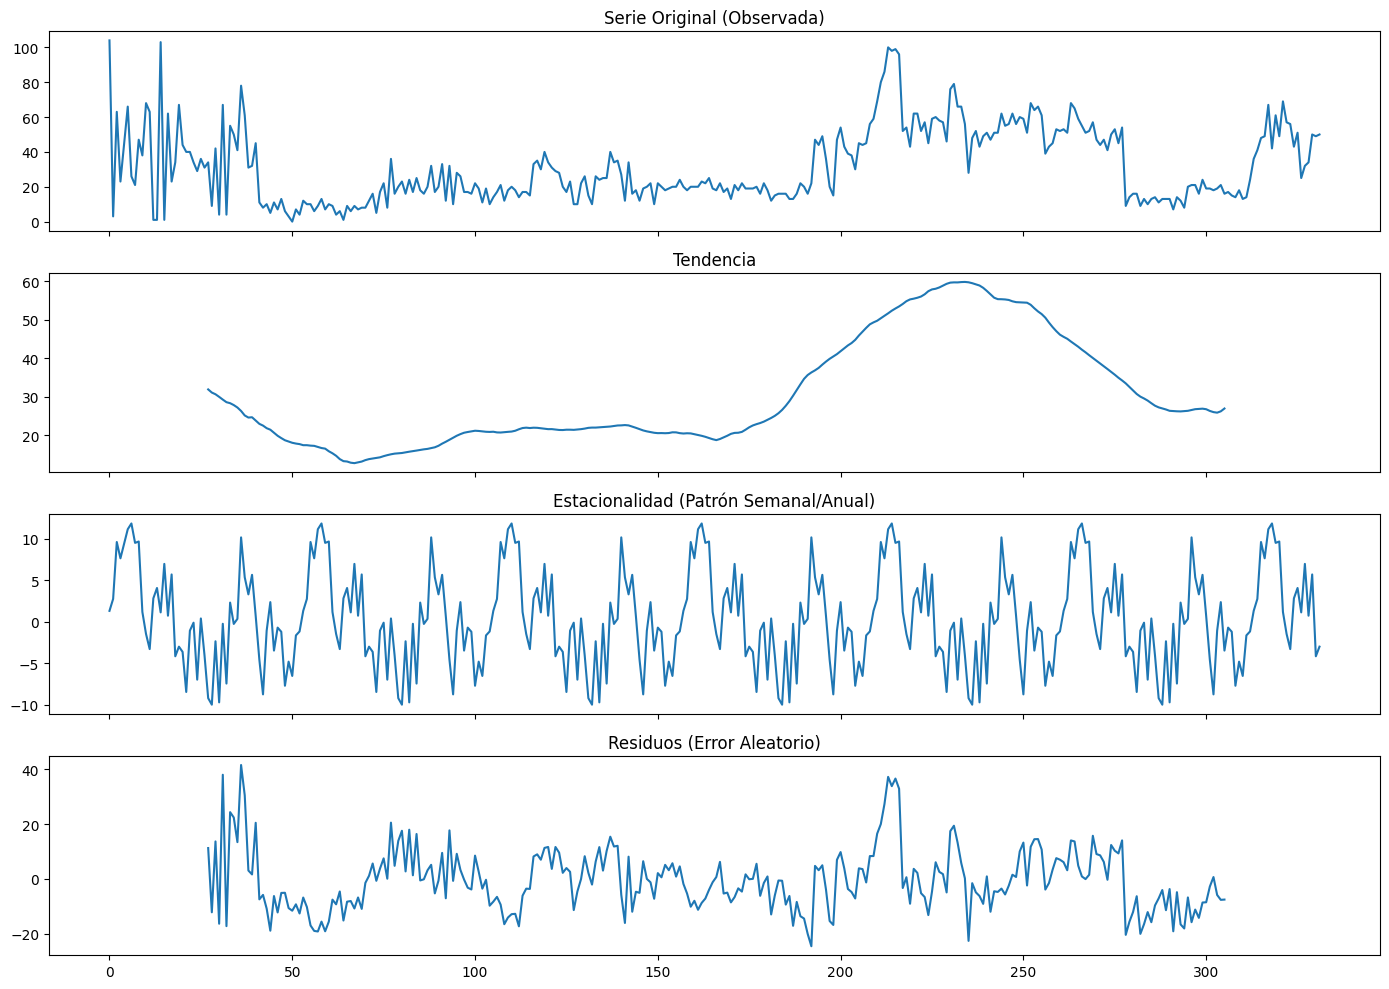

In [27]:
# Visualización de la descomposición de la serie temporal
fig, axes = plt.subplots(4, 1, figsize=(14, 10), sharex=True)

decomposition.observed.plot(ax=axes[0], title='Serie Original (Observada)')
decomposition.trend.plot(ax=axes[1], title='Tendencia')
decomposition.seasonal.plot(ax=axes[2], title='Estacionalidad (Patrón Semanal/Anual)')
decomposition.resid.plot(ax=axes[3], title='Residuos (Error Aleatorio)')

plt.tight_layout()
plt.show()

## 2. MODELOS DE SERIES TEMPORALES A UTILIZAR:
### Vamos a proponer una serie de modelos predictivos de series temporales y en función de sus resultados nos quedaremos con uno u otro para la predicción de las ampliciones en la segunda mitad del año 2025.
### Vamos a proponer los modelos en función de las variables de nuestra serie temporal, en el primer caso tenemos una serie univariante, queremos predecir el volumne de ampliaciones semanales a nivel nacional y en el segundo caso tenemos una serie multivariante cuyo objetivo será predicir el volumen de ampliaciones por regiones de España.

## 2.1 Modelos para la serie UNIVARIANTE: ARMA(p,q)/ARIMA(p,d,q)

In [30]:
# Tenemos nuestra serie univariante sin outliers df_CTO_weekly_freeoutlier
df_CTO_weekly_freeoutlier.head(5)
print(f"El número de filas y columnas es: {df_CTO_weekly_freeoutlier.shape}")

El número de filas y columnas es: (331, 5)


### Vamos a dividir el df en entrenemiento y test

In [50]:
# COnjunto de entrenamiento que nos quedaremos con los registros hasta el 30 de junio de 2024, final del Q2 de 2024
ts_train = df_CTO_weekly_freeoutlier[df_CTO_weekly_freeoutlier['Fecha de solicitud'] <= pd.to_datetime('2024-06-30')] # Hasta W3W52 2023
ts_forecast_horizon = len(pd.date_range(start='2024-07-01', periods=52, freq='W-SUN')) # 52 semanas
print(f"Conjunto de entrenamiento filas y columnas:\n {ts_train.shape}")
print(f"Fecha final del conjunto de entrenamiento\n {ts_train['Fecha de solicitud'].max()}")

Conjunto de entrenamiento filas y columnas:
 (284, 5)
Fecha final del conjunto de entrenamiento
 2024-06-30 00:00:00


### Realizamos el estudio de estacionariedad de nuestra serie temporal para ver si es necesario aplicar algún parámetro de diferenciación. Para ello realizaremos la prueba ADF donde si el párametro p-value es menor de 0.5 la serie se considera estacionaria.

In [48]:
# Importamos las librerías para ARIMA
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

resultado_adf = adfuller(ts_train['Número de ampliaciones'])

print('--- Prueba de Estacionariedad (ADF) ---')
print(f'Estadístico de prueba ADF: {resultado_adf[0]:.2f}')
print(f'Valor p (p-value): {resultado_adf[1]:.2f}')

# Interpretación: Si p-value > 0.05, la serie NO es estacionaria
if resultado_adf[1] > 0.05:
    print("CONCLUSIÓN: La serie NO es estacionaria. Se usará **ARIMA** (se requiere diferenciación).")
    d = 1 # Asumimos una diferenciación de orden 1
else:
    print("CONCLUSIÓN: La serie ES estacionaria. Se usará **ARMA**.")
    d = 0

--- Prueba de Estacionariedad (ADF) ---
Estadístico de prueba ADF: -2.67
Valor p (p-value): 0.08
CONCLUSIÓN: La serie NO es estacionaria. Se usará **ARIMA** (se requiere diferenciación).


### Nuestro p-value es 0.08 con lo que nuestra seria NO es estacionaria. Aplicaremos ARIMA con d >= 1, ahora vamos a identificar los parámetros (p,q) para poder encontrar la mejor predicción.
### Para obtner los parámetros p y d vamos a sacar las gráficas de la autocorrelación y la autocorrelación parcial de los residuos.

In [53]:
# Importamos las librerías para las gráficas de autocorrelación y autocorrelación parcial
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Aplicamos la diferenciación de orden 1 para eliminar la tendencia
ts_train_diff = ts_train['Número de ampliaciones'].diff().dropna()

# Aplicamos la prueba de la estacionariedad ADF a la serie diferenciada para ver si es necesario d=1 o d=2

print("--- Prueba de Estacionariedad (ADF) en Serie Diferenciada (d=1) ---")
# Volvemos a ejecutar la prueba ADF en la serie diferenciada
resultado_adf_diff = adfuller(ts_train_diff)
print(f'Estadístico de prueba ADF: {resultado_adf_diff[0]:.2f}')
print(f'Valor p (p-value): {resultado_adf_diff[1]:.4f}')

if resultado_adf_diff[1] <= 0.05:
    print("\nCONCLUSIÓN: La serie DIFERENCIADA es ahora estacionaria.")
    d_valor = 1
else:
    print("\nADVERTENCIA: La serie DIFERENCIADA AÚN NO es estacionaria. Podría necesitar d=2.")
    d_valor = 1 # Mantenemos d=1 para el análisis inicial

--- Prueba de Estacionariedad (ADF) en Serie Diferenciada (d=1) ---
Estadístico de prueba ADF: -11.72
Valor p (p-value): 0.0000

CONCLUSIÓN: La serie DIFERENCIADA es ahora estacionaria.


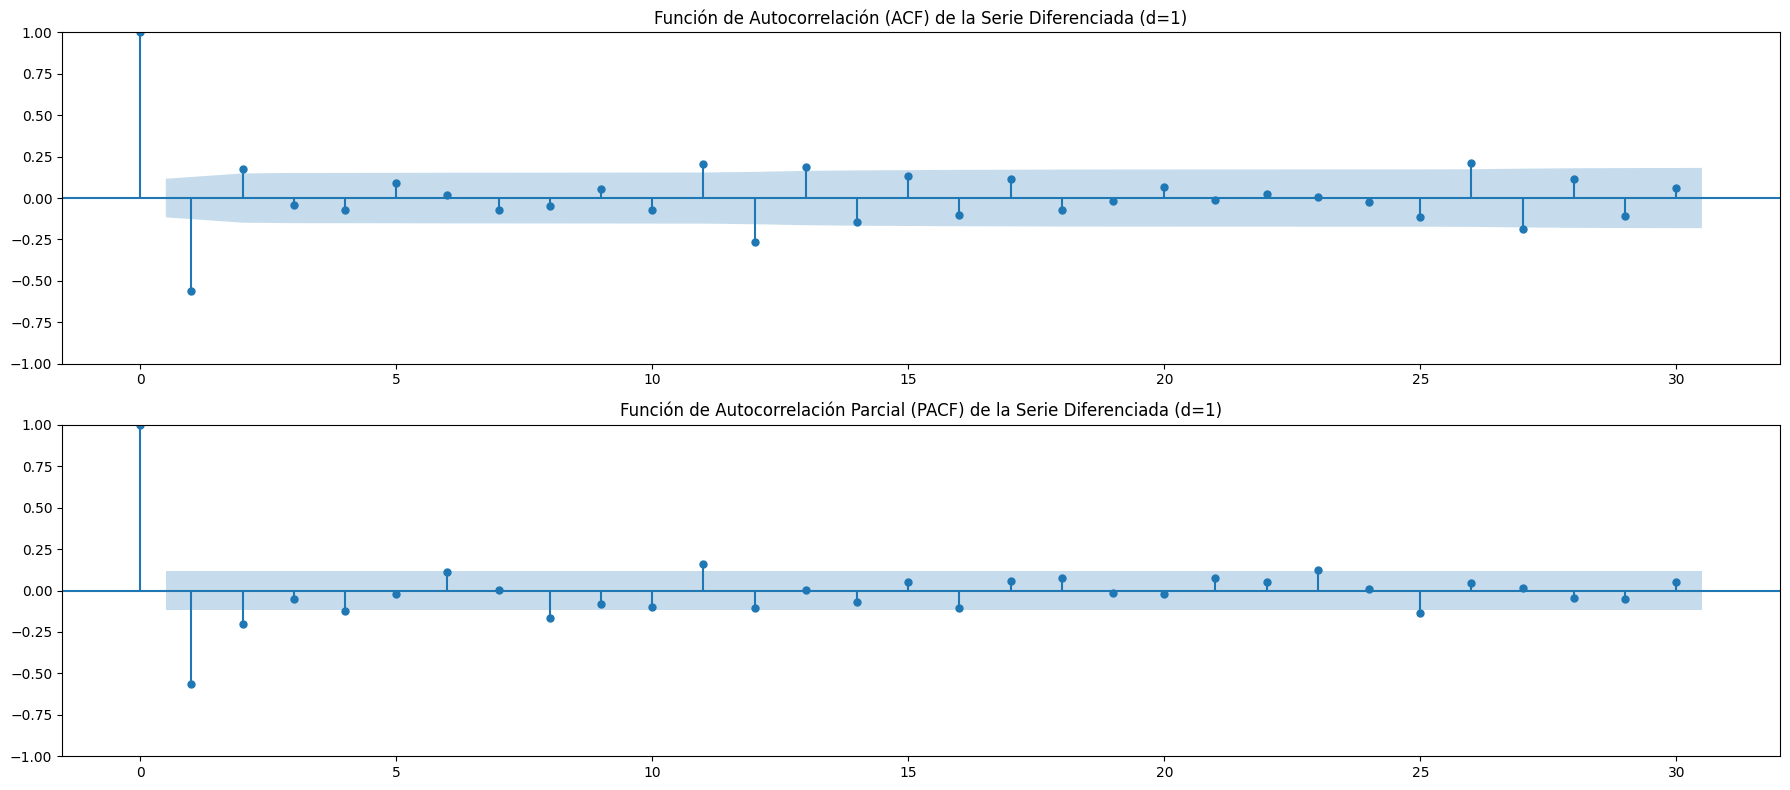

In [54]:
# Plotemoas las gráficas de autocorrelación (ACF) y autocorrelación parcial (PACF)
fig, ax = plt.subplots(2, 1, figsize=(18, 8))
# Gráfico de Autocorrelación (ACF)
plot_acf(ts_train_diff, lags=30, ax=ax[0])
ax[0].set_title('Función de Autocorrelación (ACF) de la Serie Diferenciada (d=1)')

# Gráfico de Autocorrelación Parcial (PACF)
plot_pacf(ts_train_diff, lags=30, ax=ax[1],
title='Función de Autocorrelación Parcial (PACF) de la Serie Diferenciada (d=1)')

plt.tight_layout()
plt.show()

### Podemos observar con las gráficas que para la PACF de la serie diferenciada, el corte abrupto está en p=2, el resto de los volores están dentro de la banda de confianza. Y para la gráfica de la autocorrelación ACF, el corte abrupt está en d=2, el resto de valores están dentro de la banda de confianza.
### Aplicaremos de momento ARIMA(2,1,2) y evaluaremos el AIC/BIC.

In [73]:
ts_train_freq = ts_train_diff.asfreq('W-SUN').dropna() # Aseguramos que la serie tiene frecuencia semanal
print(f"Frecuencia del índice: {ts_train_freq.index.freq}")

Frecuencia del índice: <Week: weekday=6>


In [74]:
# Esta es la corrección clave: la serie ya está lista, solo aseguramos el dtype de los valores.
ts_train_freq = ts_train_freq.astype(float)

In [75]:
# Verificación final
print(f"Tipo de dato de la serie (debe ser float): {ts_train_freq.dtype}")
print(f"Tipo de dato del índice (debe ser DatetimeIndex): {ts_train_freq.index.dtype}")
print(f"Frecuencia del índice: {ts_train_freq.index.freq}")

if ts_train_freq.dtype == float and ts_train_freq.index.dtype == 'datetime64[ns]':
    print("✅ Corrección exitosa. La serie está lista para ARIMA/SARIMA.")
else:
    print("❌ Error en la conversión. Algo no es numérico o no es fecha.")

Tipo de dato de la serie (debe ser float): float64
Tipo de dato del índice (debe ser DatetimeIndex): datetime64[ns]
Frecuencia del índice: <Week: weekday=6>
✅ Corrección exitosa. La serie está lista para ARIMA/SARIMA.


In [81]:
# Ya tenemos ARIMA importado
# Probamos con ARIMA(2,1,2) y evaluamos el AIC/BIC
parametros = (1, 1, 1) # (p,d,q)
ts_forecast_horizon = 52 # 52 semanas

try:
    arima_model = ARIMA(
        ts_train_freq,
        order=parametros,
        enforce_stationarity=False, 
        enforce_invertibility=False 
        )
    # Ajustamos el modelo ARIMA
    # ❌ Usamos el .fit() sin 'disp' para evitar el error anterior.
    # Usamos maxiter para dar más oportunidad de convergencia
    arima_results = arima_model.fit() 
    print("✅ Modelo ARIMA simplificado ajustado con éxito.")

    # Resumen del modelo
    print("\n--- Resumen del Modelo ARIMA (2, 1, 2) ---")
    print(arima_results.summary())

    # 4. Realizar el Pronóstico (52 semanas)
    forecast_arima = arima_results.get_forecast(steps=ts_forecast_horizon)
    predicciones_arima = forecast_arima.predicted_mean.round().astype(int)
    
    # 5. Guardar resultados
    df_arima_output = pd.DataFrame({
        'Fecha de solicitud': predicciones_arima.index,
        'Prediccion_Numero_Ampliaciones_ARIMA': predicciones_arima.values
    })

    print("\n--- Pronóstico Agregado Nacional (ARIMA) ---")
    print(df_arima_output.tail(10)) 

except Exception as e:
    print(f"❌ Error al ajustar el modelo ARIMA. Revisar los órdenes (p, d, q): {e}")

❌ Error al ajustar el modelo ARIMA. Revisar los órdenes (p, d, q): index 0 is out of bounds for axis 0 with size 0


c:\Users\UX530\Desktop\TFM-GIT\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [86]:
import numpy as np
print(ts_train_freq.isna().sum())  # Verifica si hay NaN
print(np.isfinite(ts_train_freq).all())  # Verifica si hay infinitos
print(ts_train_freq.describe())  # Verifica si hay varianza

0
True
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Número de ampliaciones, dtype: float64


In [88]:
# Modelos más estables
for order in [(1,1,1), (1,1,0), (2,1,1)]:
    try:
        model = ARIMA(ts_train_freq, order=order, enforce_stationarity=False, enforce_invertibility=False)
        results = model.fit()
        print(f"Modelo {order} entrenado correctamente ✅")
        break
    except Exception as e:
        print(f"Error con {order}: {e}")

c:\Users\UX530\Desktop\TFM-GIT\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\UX530\Desktop\TFM-GIT\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error con (1, 1, 1): index 0 is out of bounds for axis 0 with size 0
Error con (1, 1, 0): index 0 is out of bounds for axis 0 with size 0
Error con (2, 1, 1): index 0 is out of bounds for axis 0 with size 0


c:\Users\UX530\Desktop\TFM-GIT\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [93]:
ts_train_freq = ts_train_freq.replace([np.inf, -np.inf], np.nan).dropna()

In [ ]:
import warnings
import itertools
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA

warnings.filterwarnings("ignore")

p = d = q = range(0, 4)
pdq = list(itertools.product(p, d, q))

best_aic = np.inf
best_order = None
best_model = None

for order in pdq:
    try:
        model = ARIMA(ts_train_freq, order=order, 
                    enforce_stationarity=False, enforce_invertibility=False)
        results = model.fit()
        if results.aic < best_aic:
            best_aic, best_order, best_model = results.aic, order, results
    except:
        continue

print(f"✅ Mejor modelo encontrado: ARIMA{best_order} con AIC={best_aic:.2f}")


✅ Mejor modelo encontrado: ARIMANone con AIC=inf
